In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv(r"Dataset\dataset.csv")
df.head()

,Unnamed: 0,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Gender_Female,Gender_Male,Avg_Transaction_Amount,Add_to_Cart,Browse,Login,Purchase,Label
0,0,False,False,False,False,True,False,False,674.330112,0,5,2,3,No Fraud
1,1,True,False,False,False,False,False,True,513.363208,2,4,1,3,No Fraud
2,2,True,False,False,False,False,True,False,968.048672,2,5,1,1,No Fraud
3,3,True,False,False,False,False,False,False,297.080606,0,5,2,4,No Fraud
4,4,False,True,False,False,False,True,False,629.070774,3,5,1,6,Fraud


In [23]:
print("Duplicate values counts: ", df.duplicated().sum())

Duplicate values counts:  0


In [24]:
print("Empty values counts: ")
print(df.isnull().sum())

Empty values counts: 
Unnamed: 0                0
Age_Group_18-25           0
Age_Group_26-35           0
Age_Group_36-45           0
Age_Group_46-55           0
Age_Group_56-65           0
Gender_Female             0
Gender_Male               0
Avg_Transaction_Amount    0
Add_to_Cart               0
Browse                    0
Login                     0
Purchase                  0
Label                     0
dtype: int64


In [25]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age_Group_18-25         5000 non-null   bool   
 1   Age_Group_26-35         5000 non-null   bool   
 2   Age_Group_36-45         5000 non-null   bool   
 3   Age_Group_46-55         5000 non-null   bool   
 4   Age_Group_56-65         5000 non-null   bool   
 5   Gender_Female           5000 non-null   bool   
 6   Gender_Male             5000 non-null   bool   
 7   Avg_Transaction_Amount  5000 non-null   float64
 8   Add_to_Cart             5000 non-null   int64  
 9   Browse                  5000 non-null   int64  
 10  Login                   5000 non-null   int64  
 11  Purchase                5000 non-null   int64  
 12  Label                   5000 non-null   object 
dtypes: bool(7), float64(1), int64(4), object(1)
memory usage: 268.7+ KB


In [27]:
df["Label"].value_counts()

Label
No Fraud    3531
Fraud       1469
Name: count, dtype: int64

In [28]:
#label encoding the object data.
from sklearn.preprocessing import LabelEncoder

# Store original column names
original_columns = df.select_dtypes(include=['object', 'bool']).columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")

Mapping for column 'Age_Group_18-25':
Label 0: False
Label 1: True
Mapping for column 'Age_Group_26-35':
Label 0: False
Label 1: True
Mapping for column 'Age_Group_36-45':
Label 0: False
Label 1: True
Mapping for column 'Age_Group_46-55':
Label 0: False
Label 1: True
Mapping for column 'Age_Group_56-65':
Label 0: False
Label 1: True
Mapping for column 'Gender_Female':
Label 0: False
Label 1: True
Mapping for column 'Gender_Male':
Label 0: False
Label 1: True
Mapping for column 'Label':
Label 0: Fraud
Label 1: No Fraud


In [29]:
X = df.drop("Label", axis=1)
y = df["Label"]

In [30]:
# Handle class imbalance with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [31]:
X_resampled

,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Gender_Female,Gender_Male,Avg_Transaction_Amount,Add_to_Cart,Browse,Login,Purchase
0,0,0,0,0,1,0,0,674.330112,0,5,2,3
1,1,0,0,0,0,0,1,513.363208,2,4,1,3
2,1,0,0,0,0,1,0,968.048672,2,5,1,1
3,1,0,0,0,0,0,0,297.080606,0,5,2,4
4,0,1,0,0,0,1,0,629.070774,3,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
7057,0,0,0,0,0,0,0,728.122264,1,6,4,5
7058,0,0,0,0,0,0,0,245.504148,3,7,1,3
7059,0,0,0,0,0,0,0,354.778168,3,6,2,4
7060,1,0,0,0,0,0,0,426.859864,2,7,3,5


In [32]:
y_resampled

0       1
1       1
2       1
3       1
4       0
       ..
7057    0
7058    0
7059    0
7060    0
7061    0
Name: Label, Length: 7062, dtype: int32

In [33]:
y_resampled.value_counts()

Label
1    3531
0    3531
Name: count, dtype: int64

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_y_pred = rf_model.predict(X_test)

In [ ]:
# Accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.921830985915493


In [ ]:
# Classification Report
rf_cr = classification_report(y_test, rf_y_pred)
print("\nClassification Report:\n", rf_cr)


Classification Report:
               precision    recall  f1-score   support

       Fraud       0.87      0.88      0.91       712
   Non-Fraud       0.93      0.93      0.93       708

    accuracy                           0.91      1420
   macro avg       0.91      0.91      0.91      1420
weighted avg       0.91      0.91      0.91      1420
      


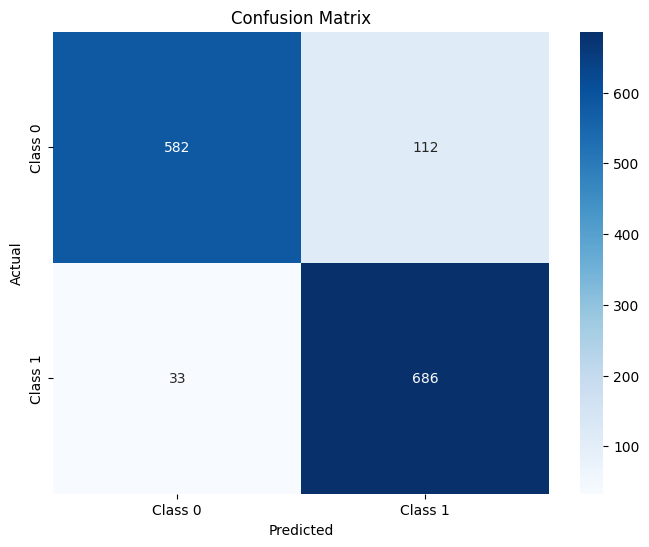

In [ ]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting model
gbc_model = GradientBoostingClassifier()

# Fit the model
gbc_model.fit(X_train, y_train)

# Predict on test data
gbc_y_pred = gbc_model.predict(X_test)

In [ ]:
# Accuracy
gbc_accuracy = accuracy_score(y_test, gbc_y_pred)
print("Accuracy:", gbc_accuracy)

Accuracy: 0.8928169014084507


In [ ]:
# Classification Report
gbc_cr = classification_report(y_test, gbc_y_pred)
print("\nClassification Report:\n", gbc_cr)


Classification Report:
               precision    recall  f1-score   support

       Fraud       0.89      0.89      0.88       712
   Non-Fraud       0.90      0.89      0.89       708

    accuracy                           0.89      1420
   macro avg       0.89      0.89      0.89      1420
weighted avg       0.89      0.89      0.89      1420
      


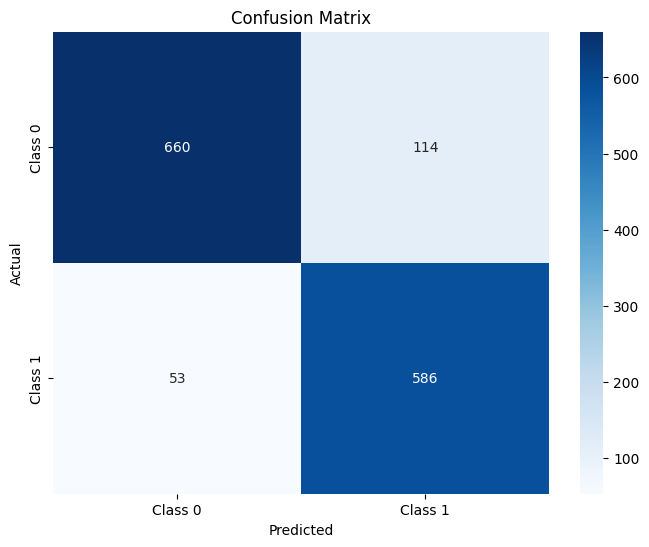

In [ ]:
# Confusion Matrix
gbc_cm = confusion_matrix(y_test, gbc_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(gbc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create the Adaboost model
ab_model = AdaBoostClassifier()

# Fit the model
ab_model.fit(X_train, y_train)

# Predict on test data
ab_y_pred = ab_model.predict(X_test)

In [ ]:
# Accuracy
ab_accuracy = accuracy_score(y_test, ab_y_pred)
print("Accuracy:", ab_accuracy)

Accuracy: 0.9028169014084507


In [ ]:
# Classification Report
ab_cr = classification_report(y_test, ab_y_pred)
print("\nClassification Report:\n", ab_cr)


Classification Report:
               precision    recall  f1-score   support

       Fraud       0.91      0.89      0.90       712
   Non-Fraud       0.89      0.91      0.90       708

    accuracy                           0.90      1420
   macro avg       0.90      0.90      0.90      1420
weighted avg       0.90      0.90      0.90      1420
      


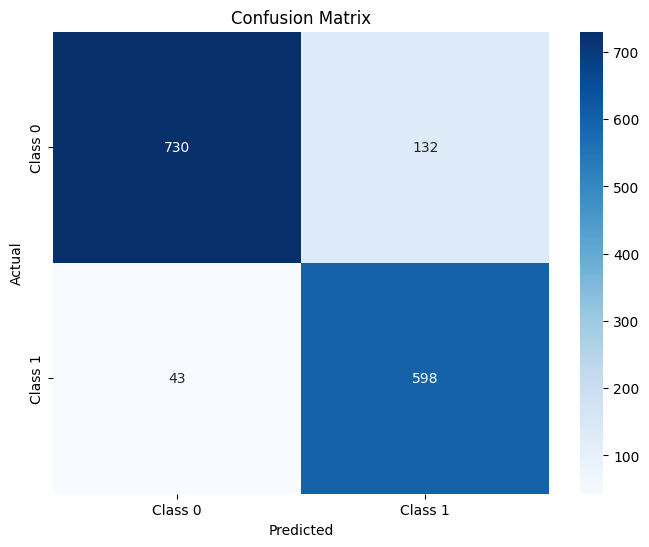

In [ ]:
# Confusion Matrix
ab_cm = confusion_matrix(y_test, ab_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ab_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## StackingClassifier

In [ ]:
# Hyperparameter tuning for random forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

In [ ]:
# Base estimators
estimators = [
    ('rf', rf_grid.best_estimator_),
    ('gb', gbc_model),
    ('ada', ab_model)
]

# meta-classifier
from sklearn.linear_model import LogisticRegression

meta_classifier = LogisticRegression()

In [ ]:
# Create the Stacking Classifier model
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)


# Fit the model
stacking_model.fit(X_train, y_train)

# Predict on test data
stackingy_pred = stacking_model.predict(X_test)

In [ ]:
# Accuracy
stackingy_accuracy = accuracy_score(y_test, stackingy_pred)
print("Accuracy:", stackingy_accuracy)

Accuracy: 0.9628169014084507


In [ ]:
# Classification Report
stackingy_cr = classification_report(y_test, stackingy_pred)
print("\nClassification Report:\n", stackingy_cr)


Classification Report:
               precision    recall  f1-score   support

       Fraud       0.96      0.96      0.96       712
   Non-Fraud       0.96      0.96      0.96       708

    accuracy                           0.96      1420
   macro avg       0.96      0.96      0.96      1420
weighted avg       0.96      0.96      0.96      1420
      


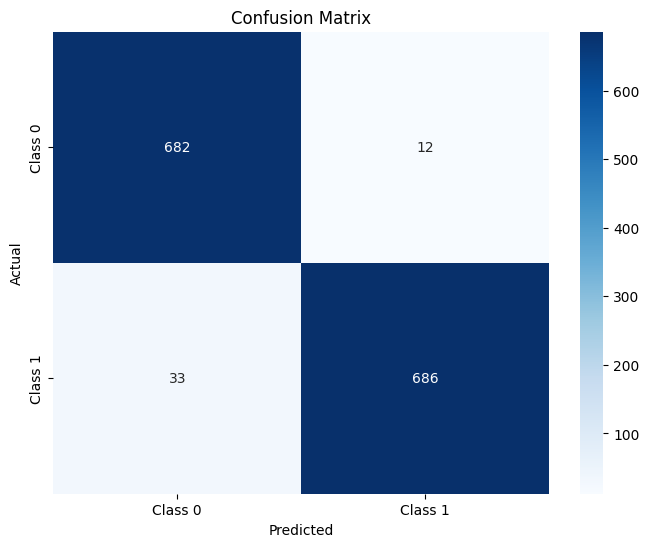

In [ ]:
# Confusion Matrix
stacking_cm = confusion_matrix(y_test, stackingy_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(stacking_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save Model
import pickle

with open('Models/random_forest.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('Models/gradient_boost.pkl', 'wb') as f:
    pickle.dump(gbc_model, f)

with open('Models/adabost.pkl', 'wb') as f:
    pickle.dump(ab_model, f)

with open('Models/stacking_clf.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)